<a href="https://colab.research.google.com/github/Yash-Patil09/Machine-Learning-Algo/blob/main/Clustering_k_Means_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CLUSTERING**

**1. K MEANS CLUSTERING**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs

In [3]:
X,y = make_blobs(n_samples=1000,centers=3,n_features=2,random_state=42)

In [4]:
X.shape

(1000, 2)

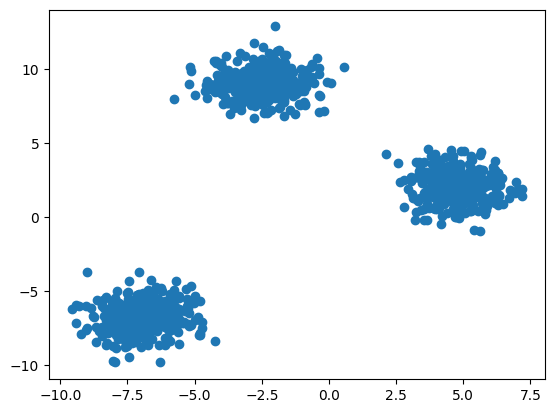

In [7]:
plt.scatter(X[:,0],X[:,1])

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
from sklearn.cluster import KMeans

**Finding K Values using Elbow Method Manually**

In [11]:
wcss = []

for k in range(1,11):
  kmeans = KMeans(n_clusters=k,init='k-means++')
  kmeans.fit(X_train)
  wcss.append(kmeans.inertia_)

In [12]:
wcss

[52946.116849197155,
 15369.674523316204,
 1599.708595009079,
 1430.3351535331062,
 1251.1090599496063,
 1047.3046561077742,
 949.9354269056399,
 875.5447251328777,
 766.3421900194581,
 676.9601777609507]

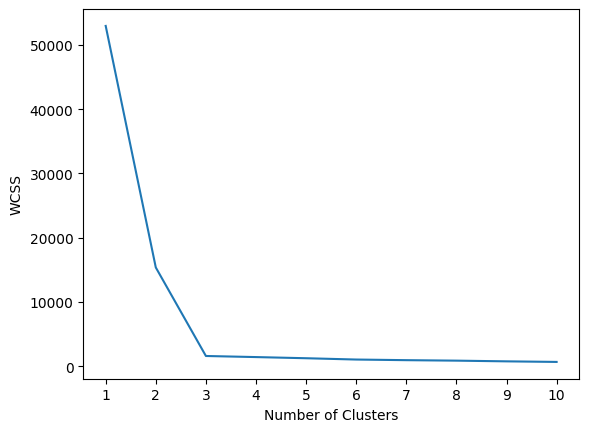

In [13]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
kmeans = KMeans(n_clusters=3,init='k-means++')

In [16]:
y_labels=kmeans.fit_predict(X_train)

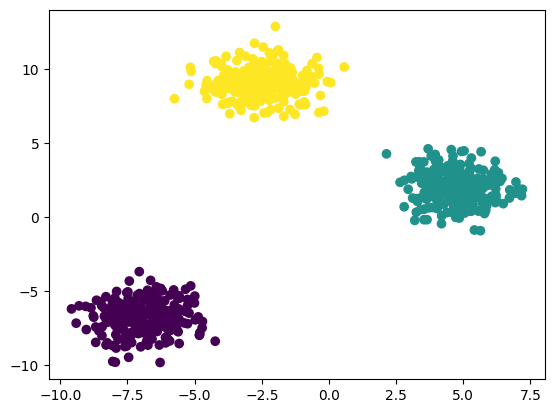

In [17]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

In [19]:
y_test_labels=kmeans.predict(X_test)

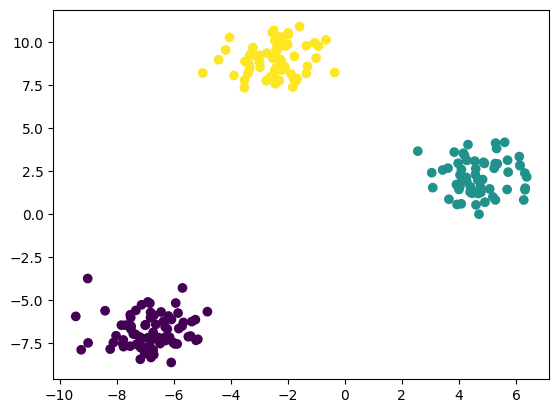

In [20]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test_labels)

**FInding K value using Library**

In [22]:
!pip install kneed

In [27]:
from kneed import KneeLocator

In [30]:
k1 = KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
k1.elbow

np.int64(3)

cruve -> Convex / Concave
Convex because the magnitude is decreasing

In [ ]:
#PERFORMANCE MATRIX

In [36]:
from sklearn.metrics import silhouette_score

In [37]:
silhouette_coef = []
for i in range(2,11):
  kmeans = KMeans(n_clusters=i,init='k-means++')
  kmeans.fit(X_train)
  score = silhouette_score(X_train,kmeans.labels_)
  silhouette_coef.append(score)

In [38]:
silhouette_coef

[np.float64(0.7006603070144354),
 np.float64(0.8413954746484233),
 np.float64(0.6621672172284631),
 np.float64(0.49953084964180533),
 np.float64(0.31960754567027616),
 np.float64(0.31979601768120836),
 np.float64(0.3308066776533628),
 np.float64(0.33256214575430204),
 np.float64(0.31866752912097396)]

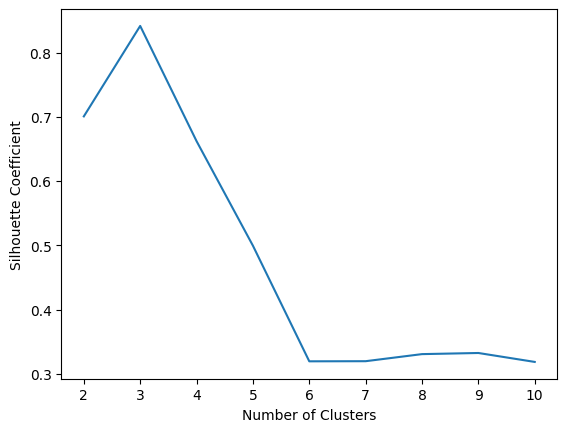

In [39]:
plt.plot(range(2,11),silhouette_coef)
plt.xticks(range(2,11))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

Si -> -1 to 1

more close to one .. is the K